# Dataset description :
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment.


# Features description :
01 - PatientId
Identification of a patient

02 - AppointmentID
Identification of each appointment

03 - Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

04 - AppointmentDay
The day of the actuall appointment, when they have to visit the doctor.

05 - ScheduledDay
The day someone called or registered the appointment, this is before appointment of course.

06 - Age
How old is the patient.

07 - Neighbourhood
Where the appointment takes place.

08 - Scholarship
True of False . Observation, this is a broad topic, consider reading this article 

09 - Hipertension
True or False

10 - Diabetes
True or False

11 - Alcoholism
True or False

12 - Handcap
True or False

13 - SMS_received
1 or more messages sent to the patient.

14 - No-show
True or False.

# Questions For Analysis (first step) :
Q1: How often do men go to hospitals compared to women? Which of them is more likely to show up?

Q2: Does recieving an SMS as a reminder affect whether or not a patient may show up? is it correlated with number of days before the appointment?

Q3: Does having a scholarship affects showing up on a hospital appointment? What are the age groups affected by this?

Q4: Does having certain deseases affect whather or not a patient may show up to their appointment? is it affected by gender?


In [28]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling (second step) :
we load data from csv file to a pandas dataframe and show some details about dataset  


In [29]:
#we load data from csv file to a pandas dataframe   
df = pd.read_csv('./noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We'll move next into exploring our dataset by going through its data types, NaNs or duplicated rows, and any columns that may need to be dropped or parsed to understand how to clean our data before making visualize

In [30]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# notes from dataset information :


we can notice there are no NaNs in our data.

we have one column float datatype,8 column int datatype ,and 5 column object(string) datatype .

PatientId and AppointmentId columns wouldn't be helpful during analysis so we can drop them.

ScheduledDay and AppointmentDay needs to be casted to date datatype.

we may append a new column for days until appointment.

Gender needs to be converted into a categoy datatype.

Scholarship Hipertension Diabetes Alcoholism Handcap better be boolean datatype.

No-show needs to be parsed and casted to boolean data type.


In [31]:
#duplicates in our data set
df.duplicated().sum()

0

no duplicated rows in dataset

In [32]:
#unique values of each column in our dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [33]:
 df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [34]:
#age colomn statistics info
df['Age'].describe() 

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

# Exploration Summery
our dataset consists of 110527 rows with 14 columns, and has no NaNs nor duplicated values.

PatientId and AppointmentId columns wouldn't be helpful during analysis.

ScheduledDay and AppointmentDay needs to be casted to date data type.

we may append a new column for days until appointment.

Gender needs to be casted into a categoy type

Scholarship, Hipertension, Diabetes, Alcoholism and SMS_recieved better be boolean data type.

No-show column needs to be parsed and asted to boolean type.

Handcap colume needs to be cleaned to have only 0 and 1 values.

Age columns has inconsistant unique values that needs to be handled.

# Data Cleaning

in this section, we'd perform some operations on our dataset based on the previous findings to make our analysis more accurate and clear

In [35]:
# dropping columns and validating changes
#df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)
# Creating a Function to remove columns
def remove_columns(columns):
    return df.drop(columns=columns, inplace=True)

# Calling th above function to remove 'Patient_id' and 'Appointment_id'
to_be_removed = ['PatientId','AppointmentID']
remove_columns(to_be_removed)
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

Handling date data type

In [36]:
df.AppointmentDay.unique

<bound method Series.unique of 0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, Length: 110527, dtype: object>

In [37]:
# extracting only day, month and year values
df['ScheduledDay'] = df['ScheduledDay'].str[:10]
df['AppointmentDay'] = df['AppointmentDay'].str[:10]

# changing data type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# confirming changes
print(df[['AppointmentDay', 'ScheduledDay']].dtypes)
df.head()

AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [38]:
# making new due days column
df['due-days'] = df['AppointmentDay'] - df['ScheduledDay']

# converting data type 
df['due-days'] = df['due-days'].dt.days

# drop sch and appoint col
df.drop(['AppointmentDay', 'ScheduledDay'], axis = 1, inplace = True)

In [39]:
# viewing summery statistics
df['due-days'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: due-days, dtype: float64

In [40]:
# viewing negative days values
df[df['due-days'] < 0 ]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
27033,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [41]:
# dropping these values and confirming changes
df.drop(df[df['due-days'] < 0].index, inplace = True)
df['due-days'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: due-days, dtype: float64

In [42]:
# converting column and confirming changes
df['Gender'] = df['Gender'].astype('category')
df['Gender'].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [43]:
# converting columns to bool and confirming changes
cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
df[cols] = df[cols].astype('bool')
df[cols].dtypes

Scholarship     bool
Hipertension    bool
Diabetes        bool
Alcoholism      bool
SMS_received    bool
dtype: object

In [44]:
# mapping alues to be more familiar
df.loc[df['No-show'] == 'Yes', 'No-show'] = 0
df.loc[df['No-show'] == 'No', 'No-show'] = 1

# casting dt type and confirming changes
df['No-show'] = df['No-show'].astype(bool)
df['No-show'].dtypes

dtype('bool')

In [45]:
# viewing rows with values of handcap > 1
df[df['Handcap'] > 1]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
946,M,94,BELA VISTA,False,True,True,False,2,True,True,15
1665,M,64,SANTA MARTHA,False,True,False,True,2,True,True,30
1666,M,64,SANTA MARTHA,False,True,False,True,2,False,True,30
2071,M,64,SANTA MARTHA,False,True,False,True,2,False,True,0
2091,F,11,ANDORINHAS,False,False,False,False,2,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
108376,F,44,ROMÃO,False,True,True,False,2,True,True,6
109484,M,64,DA PENHA,False,True,True,False,2,False,True,2
109733,F,34,JUCUTUQUARA,False,False,False,False,2,True,True,4
109975,M,39,PRAIA DO SUÁ,True,False,False,False,2,True,True,4


In [19]:
# filling the bigger values with 1
df.loc[df['Handcap'].isin([2, 3, 4]), 'Handcap'] = 1

# casting type and confirming changes
df['Handcap'] = df['Handcap'].astype('bool')
df['Handcap'].unique()

array([False,  True])

In [20]:
#exploring values below 0
df[df['Age'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
99832,F,-1,ROMÃO,False,False,False,False,False,False,True,0


In [21]:
# dropping row with negative age and confirming changes
df.drop(df[df['Age'] < 0].index, inplace = True)
df[df['Age'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days


We endded up with a datafram of 110521 rows and 11 columns, 
and everything looks tidy and clean. We'd proceed in visualizing it to extract meaningful insights from it.



# Data Visualization and EDA
Now that our data is clean, we'd perform some EDA on it in order to extract useful insights from it

In [24]:
# setting seaborn configurations
sns.set_style("whitegrid") 

# Q1 : How often do men go to hospitals compared to women? Which of them is more likely to show up?


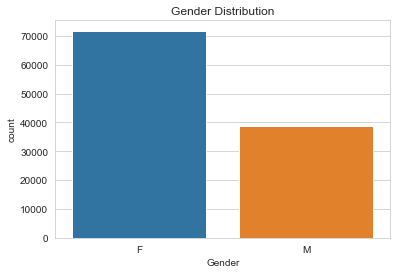

In [25]:
# viewing count plot of gender distribution in our dataset
sns.countplot(x = 'Gender', data = df)
plt.title("Gender Distribution")
plt.show()

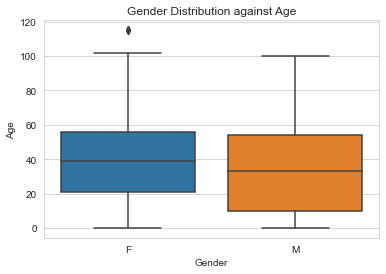

In [26]:
# viewing count plot of gender distribution against age in our dataset
sns.boxplot(x = 'Gender', y = 'Age', data = df)
plt.title("Gender Distribution against Age")
plt.show()

 we can notice that nearly half of our dataset conists of women with wider age destribution and some outliers, all of which achiees a rate higher than men.

In [27]:
df['No-show'].value_counts()

True     88207
False    22314
Name: No-show, dtype: int64

it is obvious that 79.8% of our patients did show up on their appointments and only 20.1% of them did not.
lets dive deeper to see if this is related to gender.

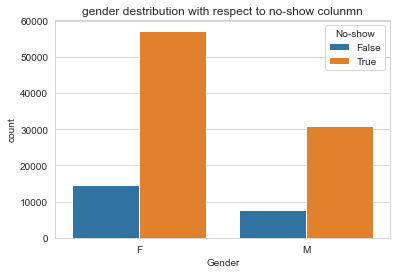

In [28]:
# showing the gender destribution with respect to the no-show colunmn
sns.countplot(x = 'Gender', data = df, hue = 'No-show')
plt.title('gender destribution with respect to no-show colunmn')
plt.show()

from the above chart, we can come up with a conclusion that women do show up on their appointments more often than men do, but this may b affected by the percentage of women on this dataset

# Q2 :Does recieving an SMS as a reminder affect whether or not a patient may show up? is it correlated with number of days before the appointment?

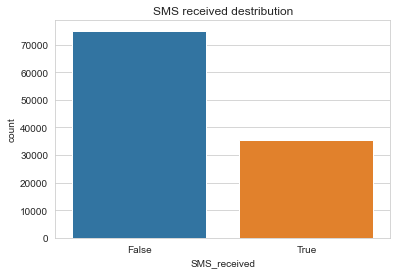

In [29]:
# viewing count plot of recieving SMS distribution in our dataset
sns.countplot(x = 'SMS_received', data = df)
plt.title("SMS received destribution")
plt.show()

In [30]:
df['SMS_received'].value_counts()

False    75039
True     35482
Name: SMS_received, dtype: int64

we can see that 67.8% of our patients did not reciee any SMS reminder of their appointments, cound this be affecting their showin up?

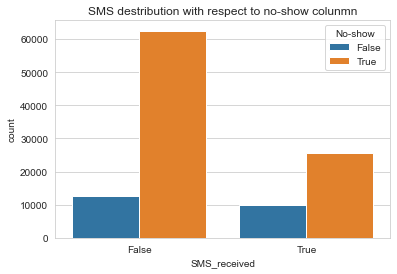

In [31]:
# showing the sms destribution with respect to the no-show colunmn
sns.countplot(x = 'SMS_received', data = df, hue = 'No-show')
plt.title('SMS destribution with respect to no-show colunmn')
plt.show()

we can see that our previous deduction was not quiet correct, as the vast majority of our patients did not recieve any SMS reminder and yet they showed up on their appointments.

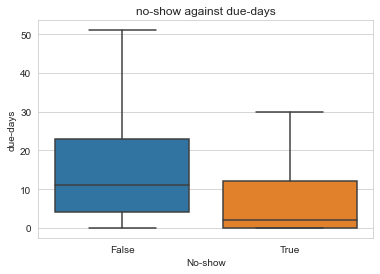

In [32]:
# viewing the correlation between no-show and due-days without outliers
sns.boxplot(x = 'No-show', y = 'due-days', data = df, showfliers = False)
plt.title('no-show against due-days')
plt.show()

it is clear that there is a correlation between number od due days and whether a patient shows up or not.
patient with appointments from 0 to 30 days tend to show up more regularly, while patients with higher number of days tend to not show up

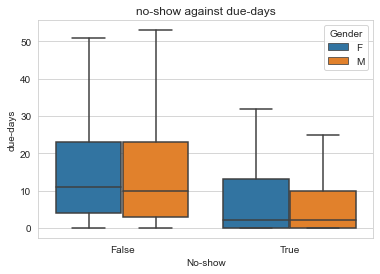

In [33]:
# viewing the correlation between no-show and due-days without outliers with respect to gender
sns.boxplot(x = 'No-show', y = 'due-days', data = df, hue = 'Gender', showfliers = False)
plt.title('no-show against due-days')
plt.show()

gender does not affect number of due days and showing up at an appointment that much.


## Q3: Does having a scholarship affects showing up on a hospital appointment? What are the age groups affected by this?

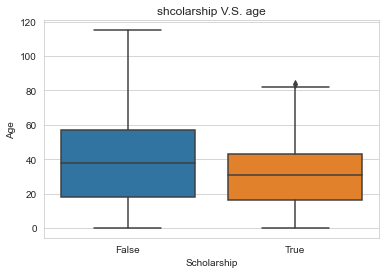

In [34]:
# plotting having a scholarship against age
sns.boxplot(x = 'Scholarship', y = 'Age', data = df)
plt.title('shcolarship V.S. age')
plt.show()

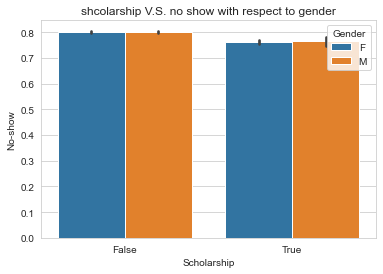

In [35]:
# plotting having a scholarship against no show with respect to gender
sns.barplot(x = 'Scholarship', y = 'No-show', hue = 'Gender', data = df)
plt.title('shcolarship V.S. no show with respect to gender')
plt.show()

<AxesSubplot:>

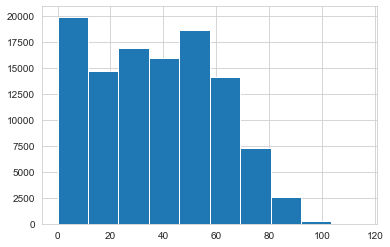

In [36]:
# ploting age destribution
df['Age'].hist()

we can see that having a scolarship does not affect showing up to a doctor appointment that much and that huge age group is enrolled to that scholarship and also enrol their babies on.

## Q4 : Does having certain deseas affects whather or not a patient may show up to their appointment? is it affected by gender?

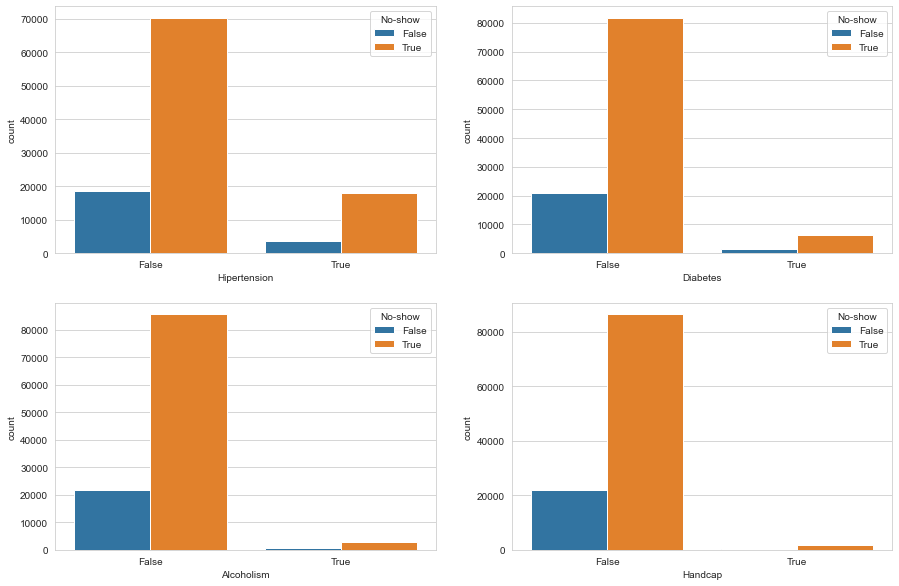

In [37]:
# plotting deseases against no show
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x = 'Hipertension', data = df, hue= 'No-show')
plt.subplot(2,2,2)
sns.countplot(x = 'Diabetes', data = df, hue= 'No-show')
plt.subplot(2,2,3)
sns.countplot(x = 'Alcoholism', data = df, hue= 'No-show')
plt.subplot(2,2,4)
sns.countplot(x = 'Handcap', data = df, hue= 'No-show')
plt.show()

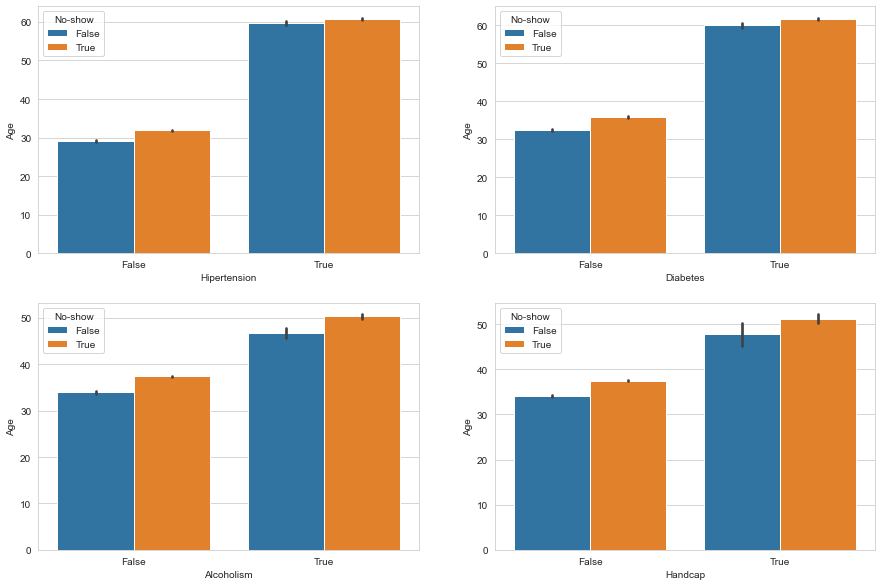

In [38]:
# plotting deseases against no show with respect to age
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Hipertension', y = 'Age', data = df, hue= 'No-show')
plt.subplot(2,2,2)
sns.barplot(x = 'Diabetes', y = 'Age', data = df, hue= 'No-show')
plt.subplot(2,2,3)
sns.barplot(x = 'Alcoholism', y = 'Age', data = df, hue= 'No-show')
plt.subplot(2,2,4)
sns.barplot(x = 'Handcap', y = 'Age', data = df, hue= 'No-show')
plt.show()

from the previous set of plots, we can conclude that the vast majority of our dataset does not have chronic deseases, yet, they are existed in so many young people.
having a chronic deseas may affect your showing up at a hospital's appointment.

array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

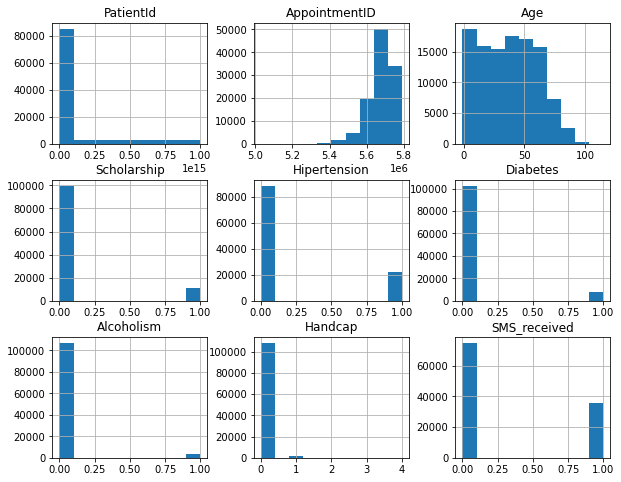

In [5]:
#visualize histogrames of features
df.hist(figsize=(10,8))

# Conclusions
Results:Our data suggest that
1. There is not big difference between the distribution of Age between patients who showed up for the appointment      versus the patients that did not show up for the appointment.
     
2. There isahigher percentage of people that received an SMS and did not show up when compared to people who          received an SMS and did show up.
     
3. People that haveadisease are3%more likely to show up for the appointment than people who do not haveadisease.
     
4. Handicap patients specifically,however,are more likely to show up to the appointment compared to people who        are not Handicap.
     
5. Being enrolled in the Scholarship program does not seem to make people more likely to show up to the                appointment.
     
Limitations:There areacouple of limitations with our data:
    
1. Most of our variables are categorical,which does not allow forahigh level of statistical method that can be        used to provide correlations etc
     
2. The statistics used here are descriptive statistics,not inferential,meaning that we did not create any              hypotheses or controlled experiments orinferences with our data.
     
3. We do not havealot of details for certain factors to draw conclusions.For the SMS_ received example,the data    shows that no-showers aremore likely to receive an SMS.This may seem counter intuitive,but we do not have              information on the conditions of when the SMS is sent.
     
For example they may target No-showers with SMS,or they may send the SMS once the Patient has not checked in 30       minutes prior to theirappointment etc.

4. Cannot show strong correlations between factors since most of our data is categorical.